In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path='/content/drive/MyDrive/Dataset Data Analitycs/finaltrain.csv'

df=pd.read_csv(file_path)

In [5]:
df.head()

,Sexe,age,Emploi,Telephone,statut_personnel,mois_pret_duree,historique de credit,but,Prix ( TND),personnes a charge,solde_d'epargne,duree_emploi,taux de versement ( par mois ),autres_debiteurs,Historique residence,propriete,logement,credits_existants,Score
0,Homme,67,employe qualifie,21306316,Celibataire,6,critique,Electronique,2338,1,0,13 ans,4,rien,6 ans,immobilier,propre,2,0
1,Femme,22,employe qualifie,29241770,NaN,48,rembourse,Electronique,1190,1,890,2 annees,2,rien,5 mois,immobilier,propre,1,1
2,Homme,45,employe qualifie,20505876,Celibataire,42,rembourse,meubles,15764,2,90,5 annees,2,garant,13 ans,l'epargne de la societe de construction,gratuitement,1,0
3,Homme,35,resident non qualifie,24268700,Celibataire,36,rembourse,education,18110,2,0,2 annees,2,rien,8 annees,inconnu/aucun,gratuitement,1,0
4,Homme,35,independant de gestion,27233723,Celibataire,36,rembourse,voiture (occasion),13896,1,570,2 annees,2,rien,3 mois,autre,louer,1,0


In [17]:
# nama nama columns
df.columns

Index(['Sexe', 'age', 'Emploi', 'Telephone', 'statut_personnel',
       'mois_pret_duree', 'historique de credit', 'but', 'Prix ( TND)',
       'personnes a charge', 'solde_d'epargne', 'duree_emploi',
       'taux de versement ( par mois ) ', 'autres_debiteurs',
       'Historique residence', 'propriete', 'logement', 'credits_existants',
       'Score'],
      dtype='object')

In [18]:
#jumlah columns

num_rows, num_colums=df.shape

num_rows

num_colums

19

In [5]:
# Mengecek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
Sexe                                  0
age                                   0
Emploi                                0
Telephone                             0
statut_personnel                   1260
mois_pret_duree                       0
historique de credit                  0
but                                   0
Prix ( TND)                           0
personnes a charge                    0
solde_d'epargne                       0
duree_emploi                        282
taux de versement ( par mois )        0
autres_debiteurs                      0
Historique residence                522
propriete                             0
logement                              0
credits_existants                     0
Score                                 0
dtype: int64


In [20]:
# kolom dengan missing value paling besar
kolom_datahilang_palingbesar=df.isnull().sum().idxmax()

# nama kolom dengan data yang paling banyak hilang
print(f"Kolom dengan daya hilang paling besar :{kolom_datahilang_palingbesar}")

# jumlah nilai yang hilang di kolom tsb
jumlah_hilang=df[kolom_datahilang_palingbesar].isnull().sum()
print(f"Jumlah kolom dengan data hilang paling besar :{jumlah_hilang}")

# tampilan komposisi data yang hilang pada kolom tsb
komposisi=df[kolom_datahilang_palingbesar].value_counts(dropna=False)
komposisi

Kolom dengan daya hilang paling besar :statut_personnel
Jumlah kolom dengan data hilang paling besar :1260


,count
statut_personnel,
Celibataire,2406
NaN,1260
marie,384
divorce,198


In [6]:
# Mengisi missing values
# Untuk kolom numerik: gunakan median
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Untuk kolom kategorikal: gunakan mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-6-eeaf5f780d5d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-6-eeaf5f780d5d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [7]:
# Mengecek ulang missing values
print("\n=== Missing Values Setelah Imputasi ===")
print(df.isnull().sum())


=== Missing Values Setelah Imputasi ===
Sexe                               0
age                                0
Emploi                             0
Telephone                          0
statut_personnel                   0
mois_pret_duree                    0
historique de credit               0
but                                0
Prix ( TND)                        0
personnes a charge                 0
solde_d'epargne                    0
duree_emploi                       0
taux de versement ( par mois )     0
autres_debiteurs                   0
Historique residence               0
propriete                          0
logement                           0
credits_existants                  0
Score                              0
dtype: int64


In [8]:
# membuat copyan
df_copy=df.copy()
df_copy

,Sexe,age,Emploi,Telephone,statut_personnel,mois_pret_duree,historique de credit,but,Prix ( TND),personnes a charge,solde_d'epargne,duree_emploi,taux de versement ( par mois ),autres_debiteurs,Historique residence,propriete,logement,credits_existants,Score
0,Homme,67,employe qualifie,21306316,Celibataire,6,critique,Electronique,2338,1,0,13 ans,4,rien,6 ans,immobilier,propre,2,0
1,Femme,22,employe qualifie,29241770,Celibataire,48,rembourse,Electronique,1190,1,890,2 annees,2,rien,5 mois,immobilier,propre,1,1
2,Homme,45,employe qualifie,20505876,Celibataire,42,rembourse,meubles,15764,2,90,5 annees,2,garant,13 ans,l'epargne de la societe de construction,gratuitement,1,0
3,Homme,35,resident non qualifie,24268700,Celibataire,36,rembourse,education,18110,2,0,2 annees,2,rien,8 annees,inconnu/aucun,gratuitement,1,0
4,Homme,35,independant de gestion,27233723,Celibataire,36,rembourse,voiture (occasion),13896,1,570,2 annees,2,rien,3 mois,autre,louer,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,Homme,29,independant de gestion,24967714,Celibataire,24,rembourse,voiture (occasion),13158,1,210,1 ans,4,rien,10 mois,inconnu/aucun,gratuitement,1,0
4244,Homme,48,resident non qualifie,27697199,Celibataire,24,critique,Electronique,3486,1,400,13 ans,4,rien,4 mois,l'epargne de la societe de construction,propre,2,0
4245,Homme,50,employe qualifie,23616215,Celibataire,12,rembourse,voiture (neuve),4780,1,0,17 ans,4,rien,1 ans,autre,propre,1,0
4246,Homme,38,employe qualifie,24888543,Celibataire,12,rembourse,Electronique,1608,1,440,13 ans,4,rien,16 ans,autre,propre,1,0


In [9]:
# save file
df_copy.to_csv('newdata.csv', index=False)

# ____**exploratory data analysis**____

In [21]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the dataset
file_path_eda = '/content/drive/MyDrive/Dataset Data Analitycs/newdata.csv'
data_eda = pd.read_csv(file_path_eda)

In [24]:
# Informasi dataset
print("=== Informasi Dataset ===")
df.info()

=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Sexe                             4248 non-null   object
 1   age                              4248 non-null   int64 
 2   Emploi                           4248 non-null   object
 3   Telephone                        4248 non-null   int64 
 4   statut_personnel                 4248 non-null   object
 5   mois_pret_duree                  4248 non-null   int64 
 6   historique de credit             4248 non-null   object
 7   but                              4248 non-null   object
 8   Prix ( TND)                      4248 non-null   int64 
 9   personnes a charge               4248 non-null   int64 
 10  solde_d'epargne                  4248 non-null   int64 
 11  duree_emploi                     4248 non-null   object
 12  taux de 

In [25]:
# Statistik deskriptif
print("\n=== Statistik Deskriptif ===")
display(df.describe())


=== Statistik Deskriptif ===


,age,Telephone,mois_pret_duree,Prix ( TND),personnes a charge,solde_d'epargne,taux de versement ( par mois ),credits_existants,Score
count,4248.000000,4.248000e+03,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000,4248.000000
mean,35.877119,2.508381e+07,20.772599,6544.500000,1.161017,6218.666667,2.966102,1.423729,0.298023
std,11.549729,2.704389e+06,11.950474,5745.363404,0.375198,26424.873097,1.115754,0.595345,0.457443
min,19.000000,2.036028e+07,4.000000,500.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,27.000000,2.274078e+07,12.000000,2728.000000,1.000000,110.000000,2.000000,1.000000,0.000000
50%,33.000000,2.502144e+07,18.000000,4618.000000,1.000000,505.000000,3.000000,1.000000,0.000000
75%,42.000000,2.746655e+07,24.000000,7921.000000,1.000000,930.000000,4.000000,2.000000,1.000000
max,75.000000,2.975315e+07,72.000000,44820.000000,3.000000,199700.000000,4.000000,4.000000,1.000000


In [26]:
# Mengecek missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Missing Values ===
Sexe                               0
age                                0
Emploi                             0
Telephone                          0
statut_personnel                   0
mois_pret_duree                    0
historique de credit               0
but                                0
Prix ( TND)                        0
personnes a charge                 0
solde_d'epargne                    0
duree_emploi                       0
taux de versement ( par mois )     0
autres_debiteurs                   0
Historique residence               0
propriete                          0
logement                           0
credits_existants                  0
Score                              0
dtype: int64


In [27]:
# Contoh data
print("\n=== Contoh Data (5 Baris Pertama) ===")
display(df.head())


=== Contoh Data (5 Baris Pertama) ===


,Sexe,age,Emploi,Telephone,statut_personnel,mois_pret_duree,historique de credit,but,Prix ( TND),personnes a charge,solde_d'epargne,duree_emploi,taux de versement ( par mois ),autres_debiteurs,Historique residence,propriete,logement,credits_existants,Score
0,Homme,67,employe qualifie,21306316,Celibataire,6,critique,Electronique,2338,1,0,13 ans,4,rien,6 ans,immobilier,propre,2,0
1,Femme,22,employe qualifie,29241770,Celibataire,48,rembourse,Electronique,1190,1,890,2 annees,2,rien,5 mois,immobilier,propre,1,1
2,Homme,45,employe qualifie,20505876,Celibataire,42,rembourse,meubles,15764,2,90,5 annees,2,garant,13 ans,l'epargne de la societe de construction,gratuitement,1,0
3,Homme,35,resident non qualifie,24268700,Celibataire,36,rembourse,education,18110,2,0,2 annees,2,rien,8 annees,inconnu/aucun,gratuitement,1,0
4,Homme,35,independant de gestion,27233723,Celibataire,36,rembourse,voiture (occasion),13896,1,570,2 annees,2,rien,3 mois,autre,louer,1,0


# Visualisasi data

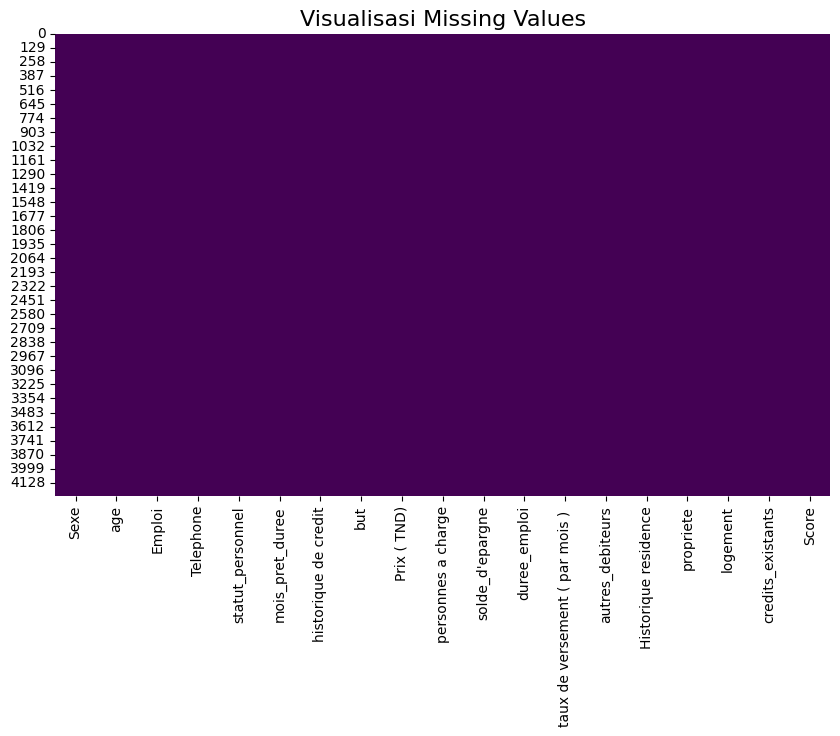

In [29]:
# Visualisasi Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values', fontsize=16)
plt.show()

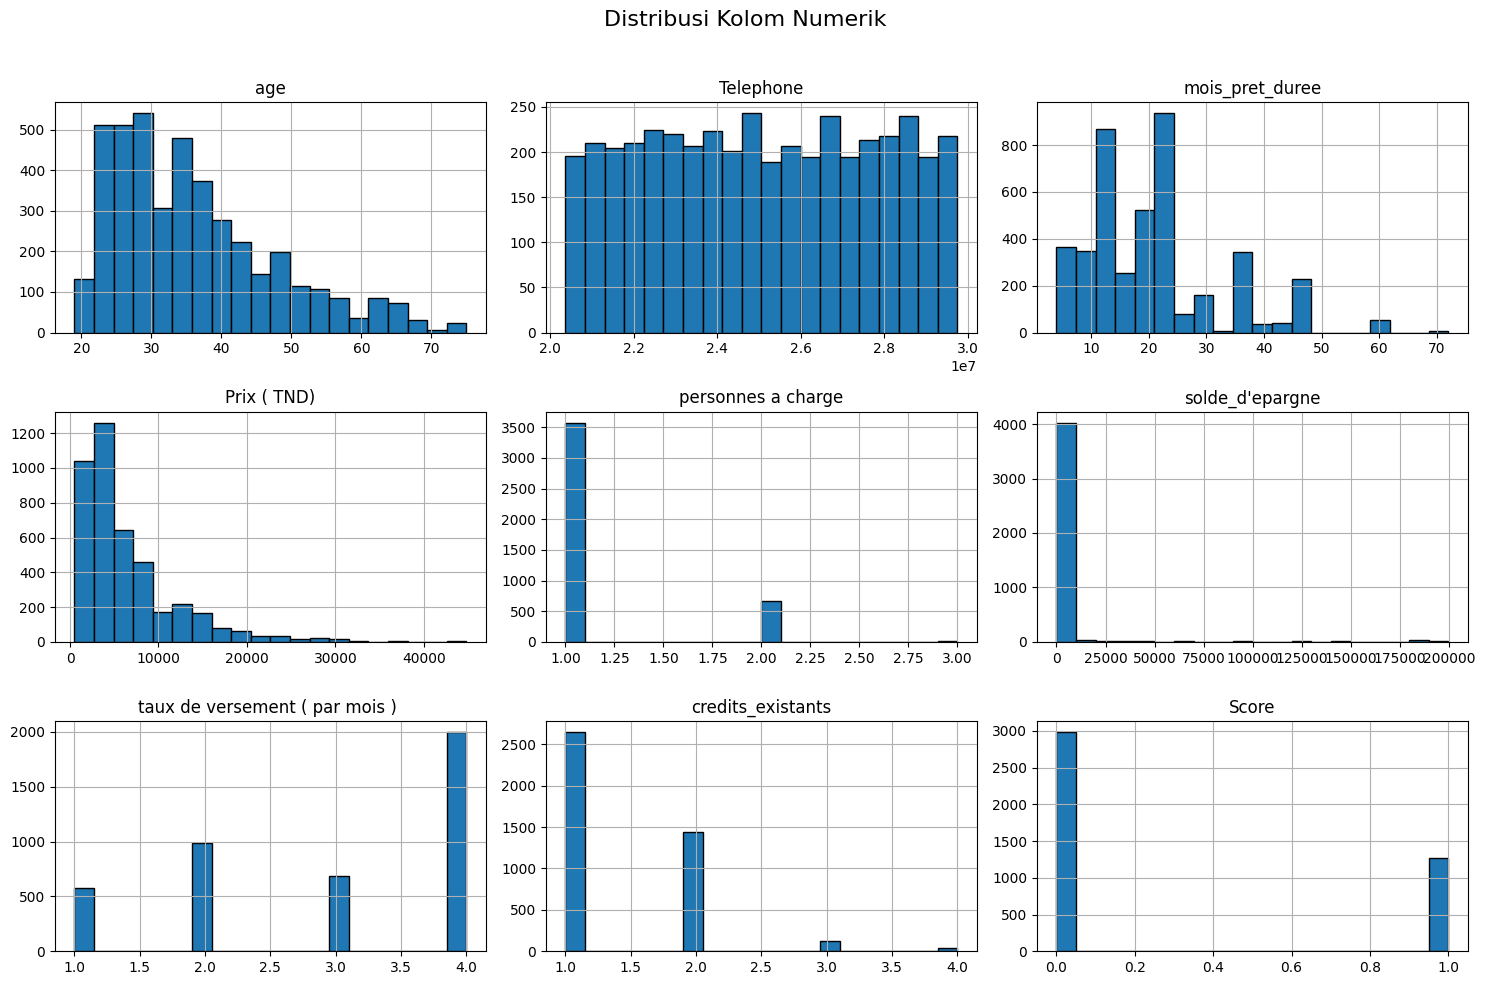

In [30]:
# Histogram untuk kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(15, 10), bins=20, edgecolor='black', layout=(3, 3))
plt.suptitle('Distribusi Kolom Numerik', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [36]:
# Pilih hanya kolom numerik untuk heatmap korelasi
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()

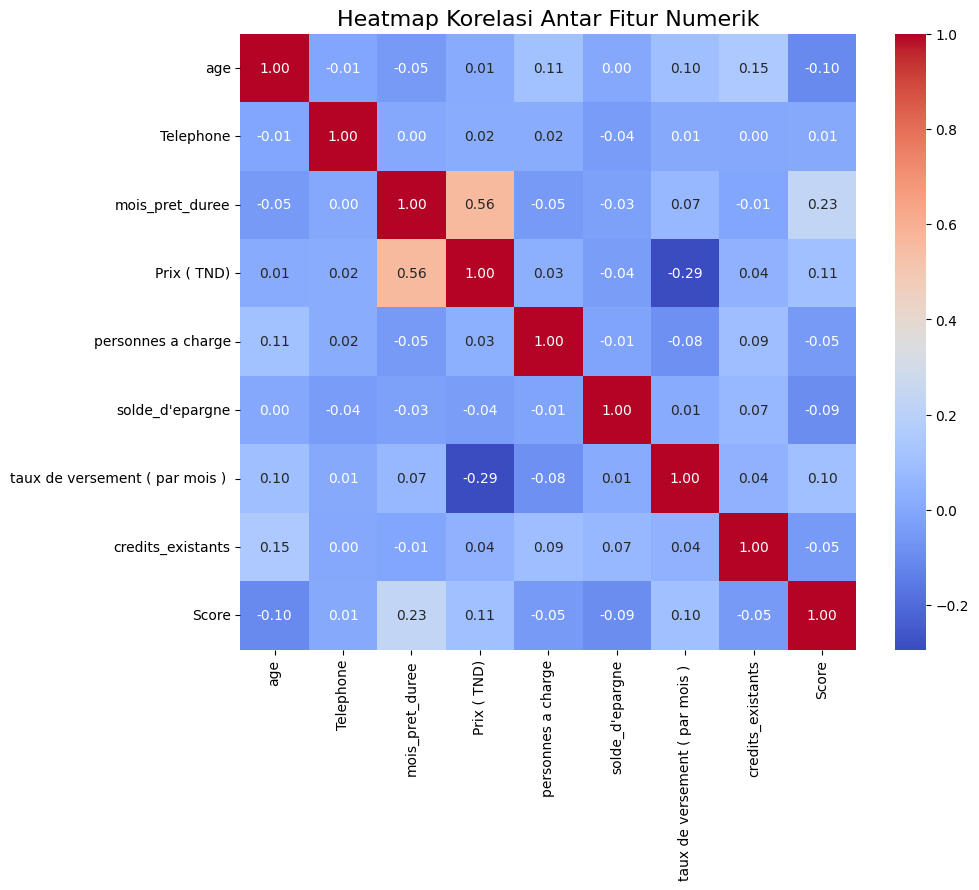

In [37]:
# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)
plt.show()

In [43]:
categorical_cols = df.select_dtypes(include=['object']).columns

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


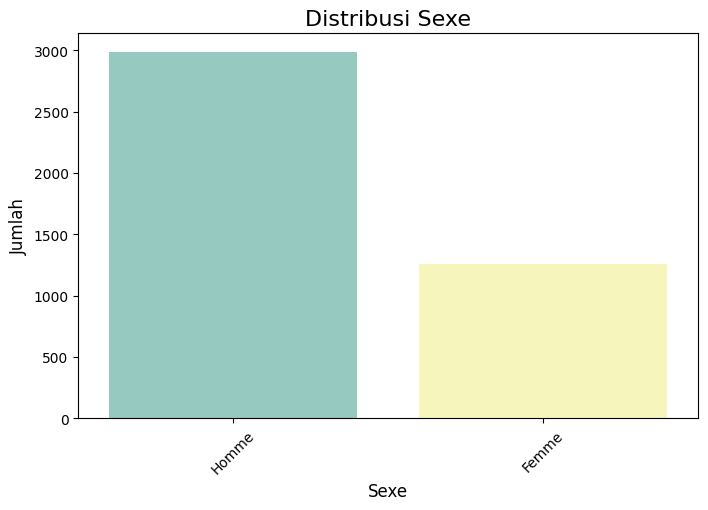

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


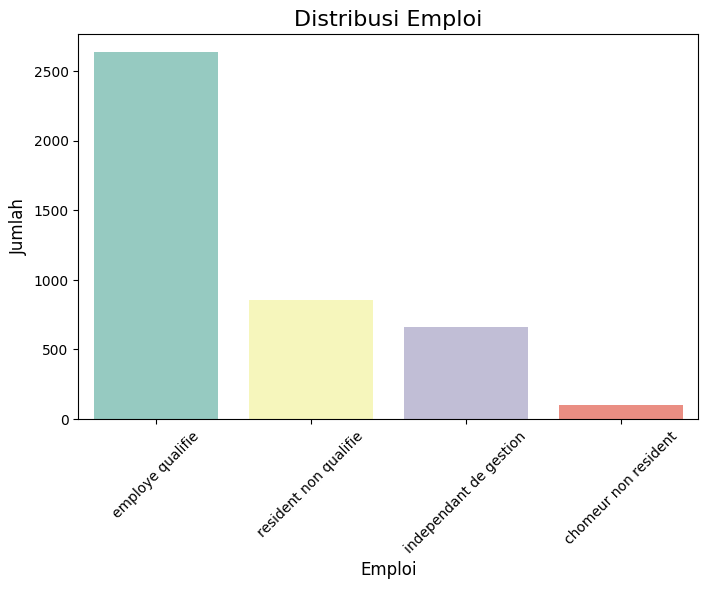

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


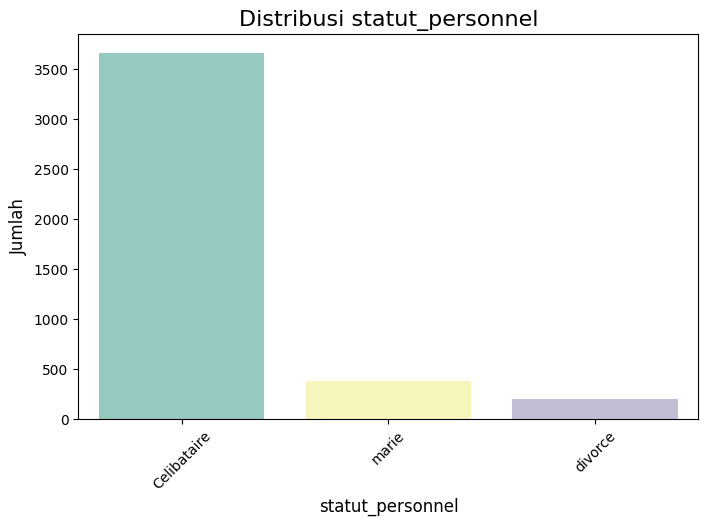

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


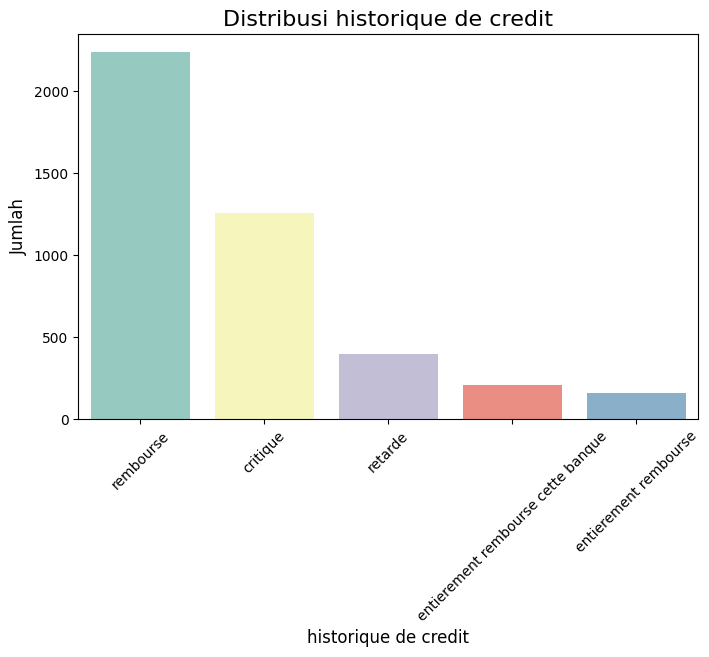

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


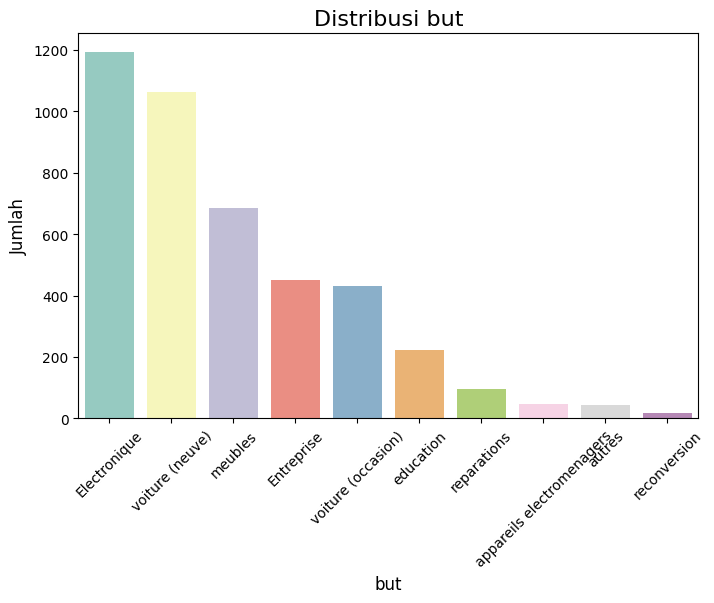

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


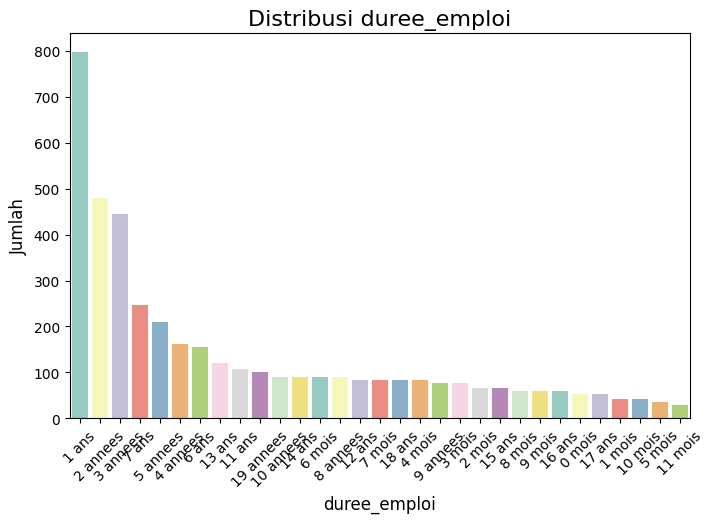

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


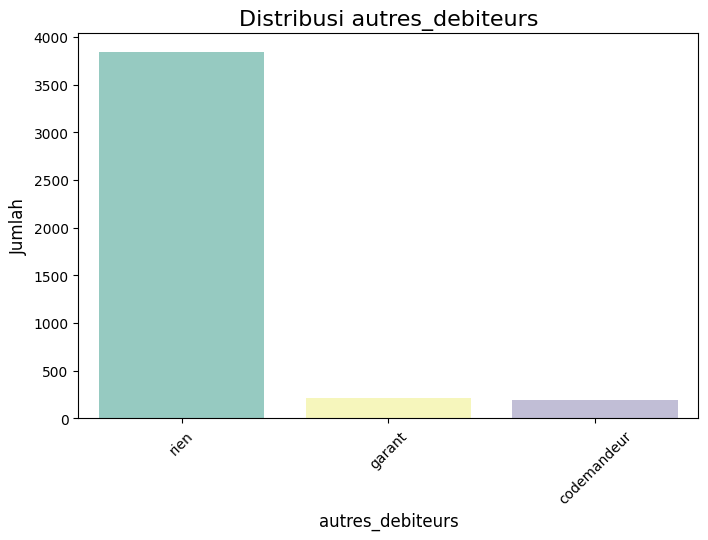

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


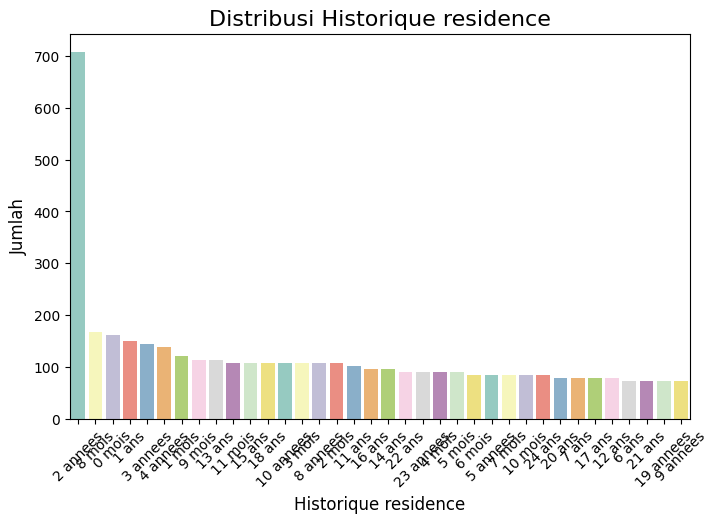

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


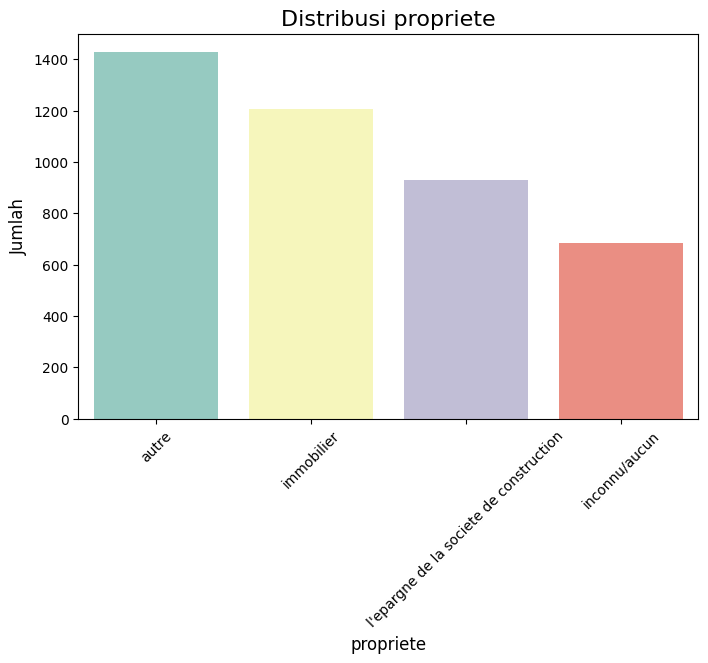

<ipython-input-45-b1afdad4d934>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')


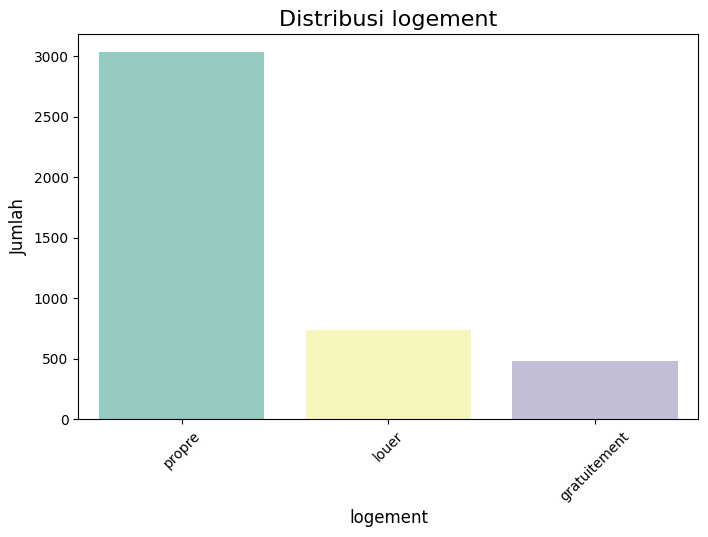

In [45]:
# Loop untuk membuat countplot setiap kolom kategorikal
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set3')
    plt.title(f'Distribusi {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


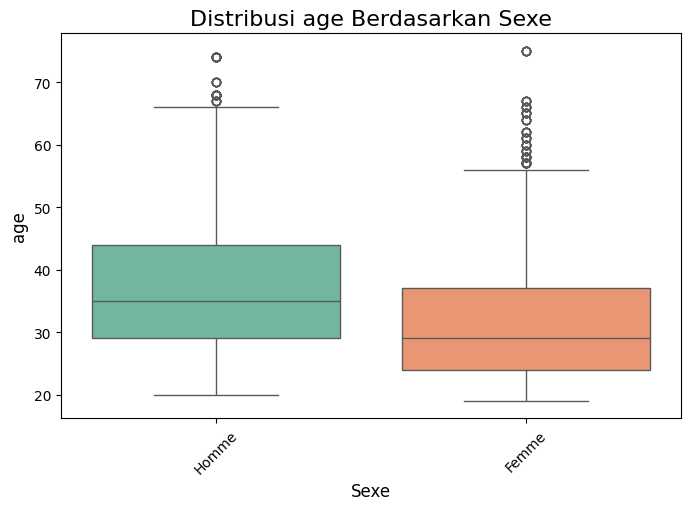

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


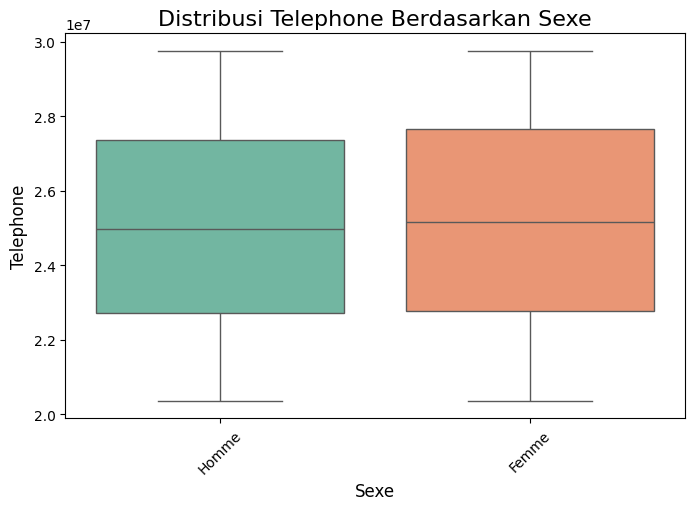

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


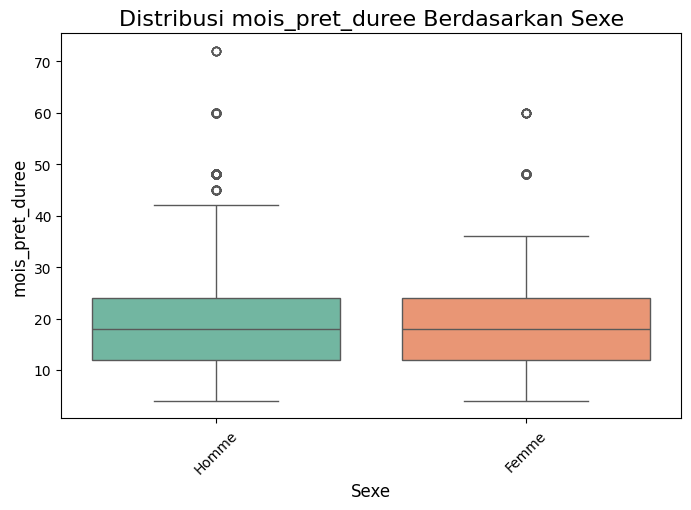

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


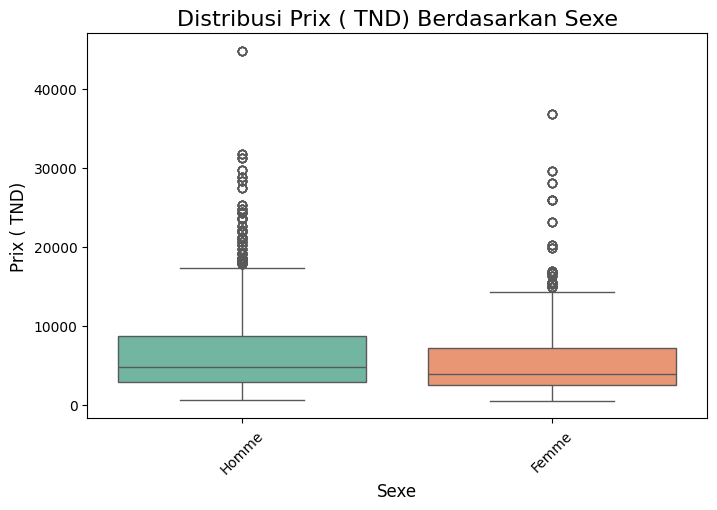

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


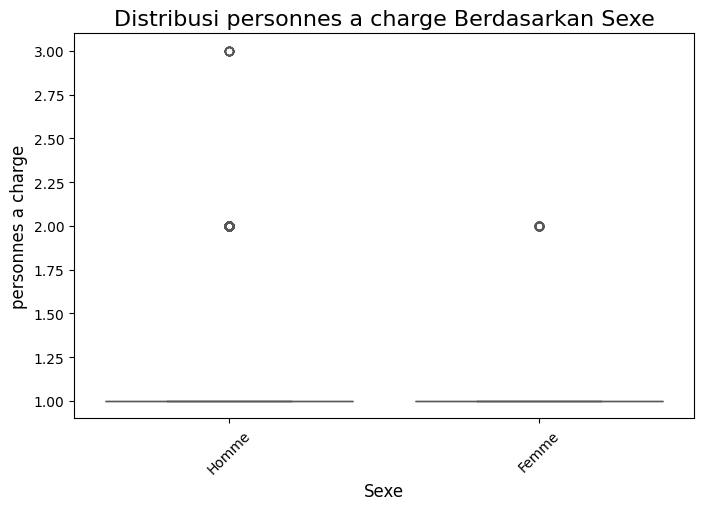

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


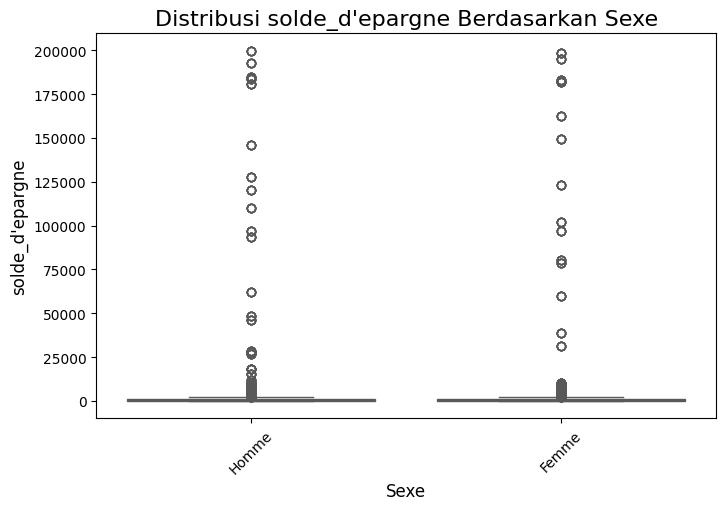

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


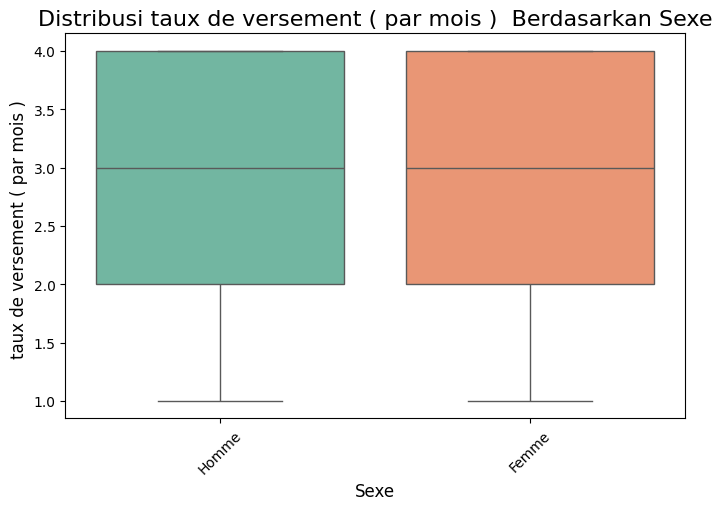

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


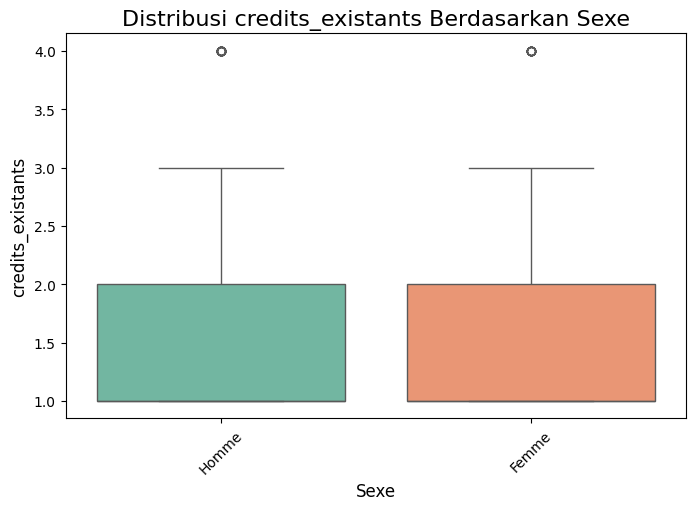

<ipython-input-46-d3ec5e1d9373>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')


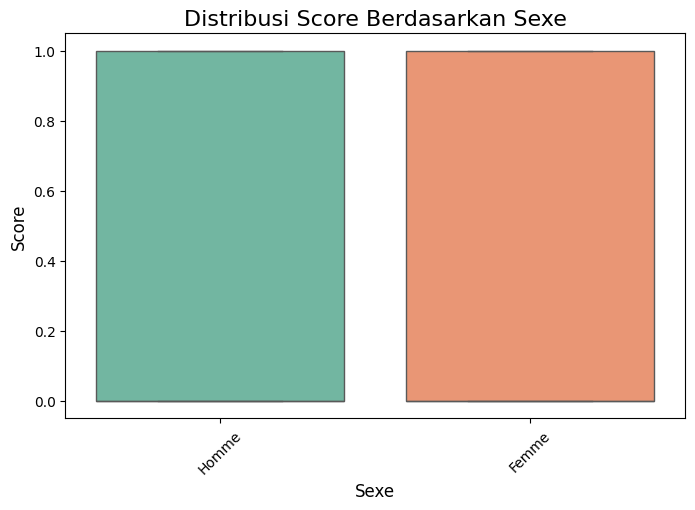

In [46]:
# Boxplot untuk Kolom Numerik dan Kategorikal
# Contoh: Ubah "categorical_cols[0]" jika ingin menggunakan kategori tertentu
for col in numerical_cols:
    if len(categorical_cols) > 0:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=categorical_cols[0], y=col, data=df, palette='Set2')
        plt.title(f'Distribusi {col} Berdasarkan {categorical_cols[0]}', fontsize=16)
        plt.xlabel(categorical_cols[0], fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(rotation=45)
        plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

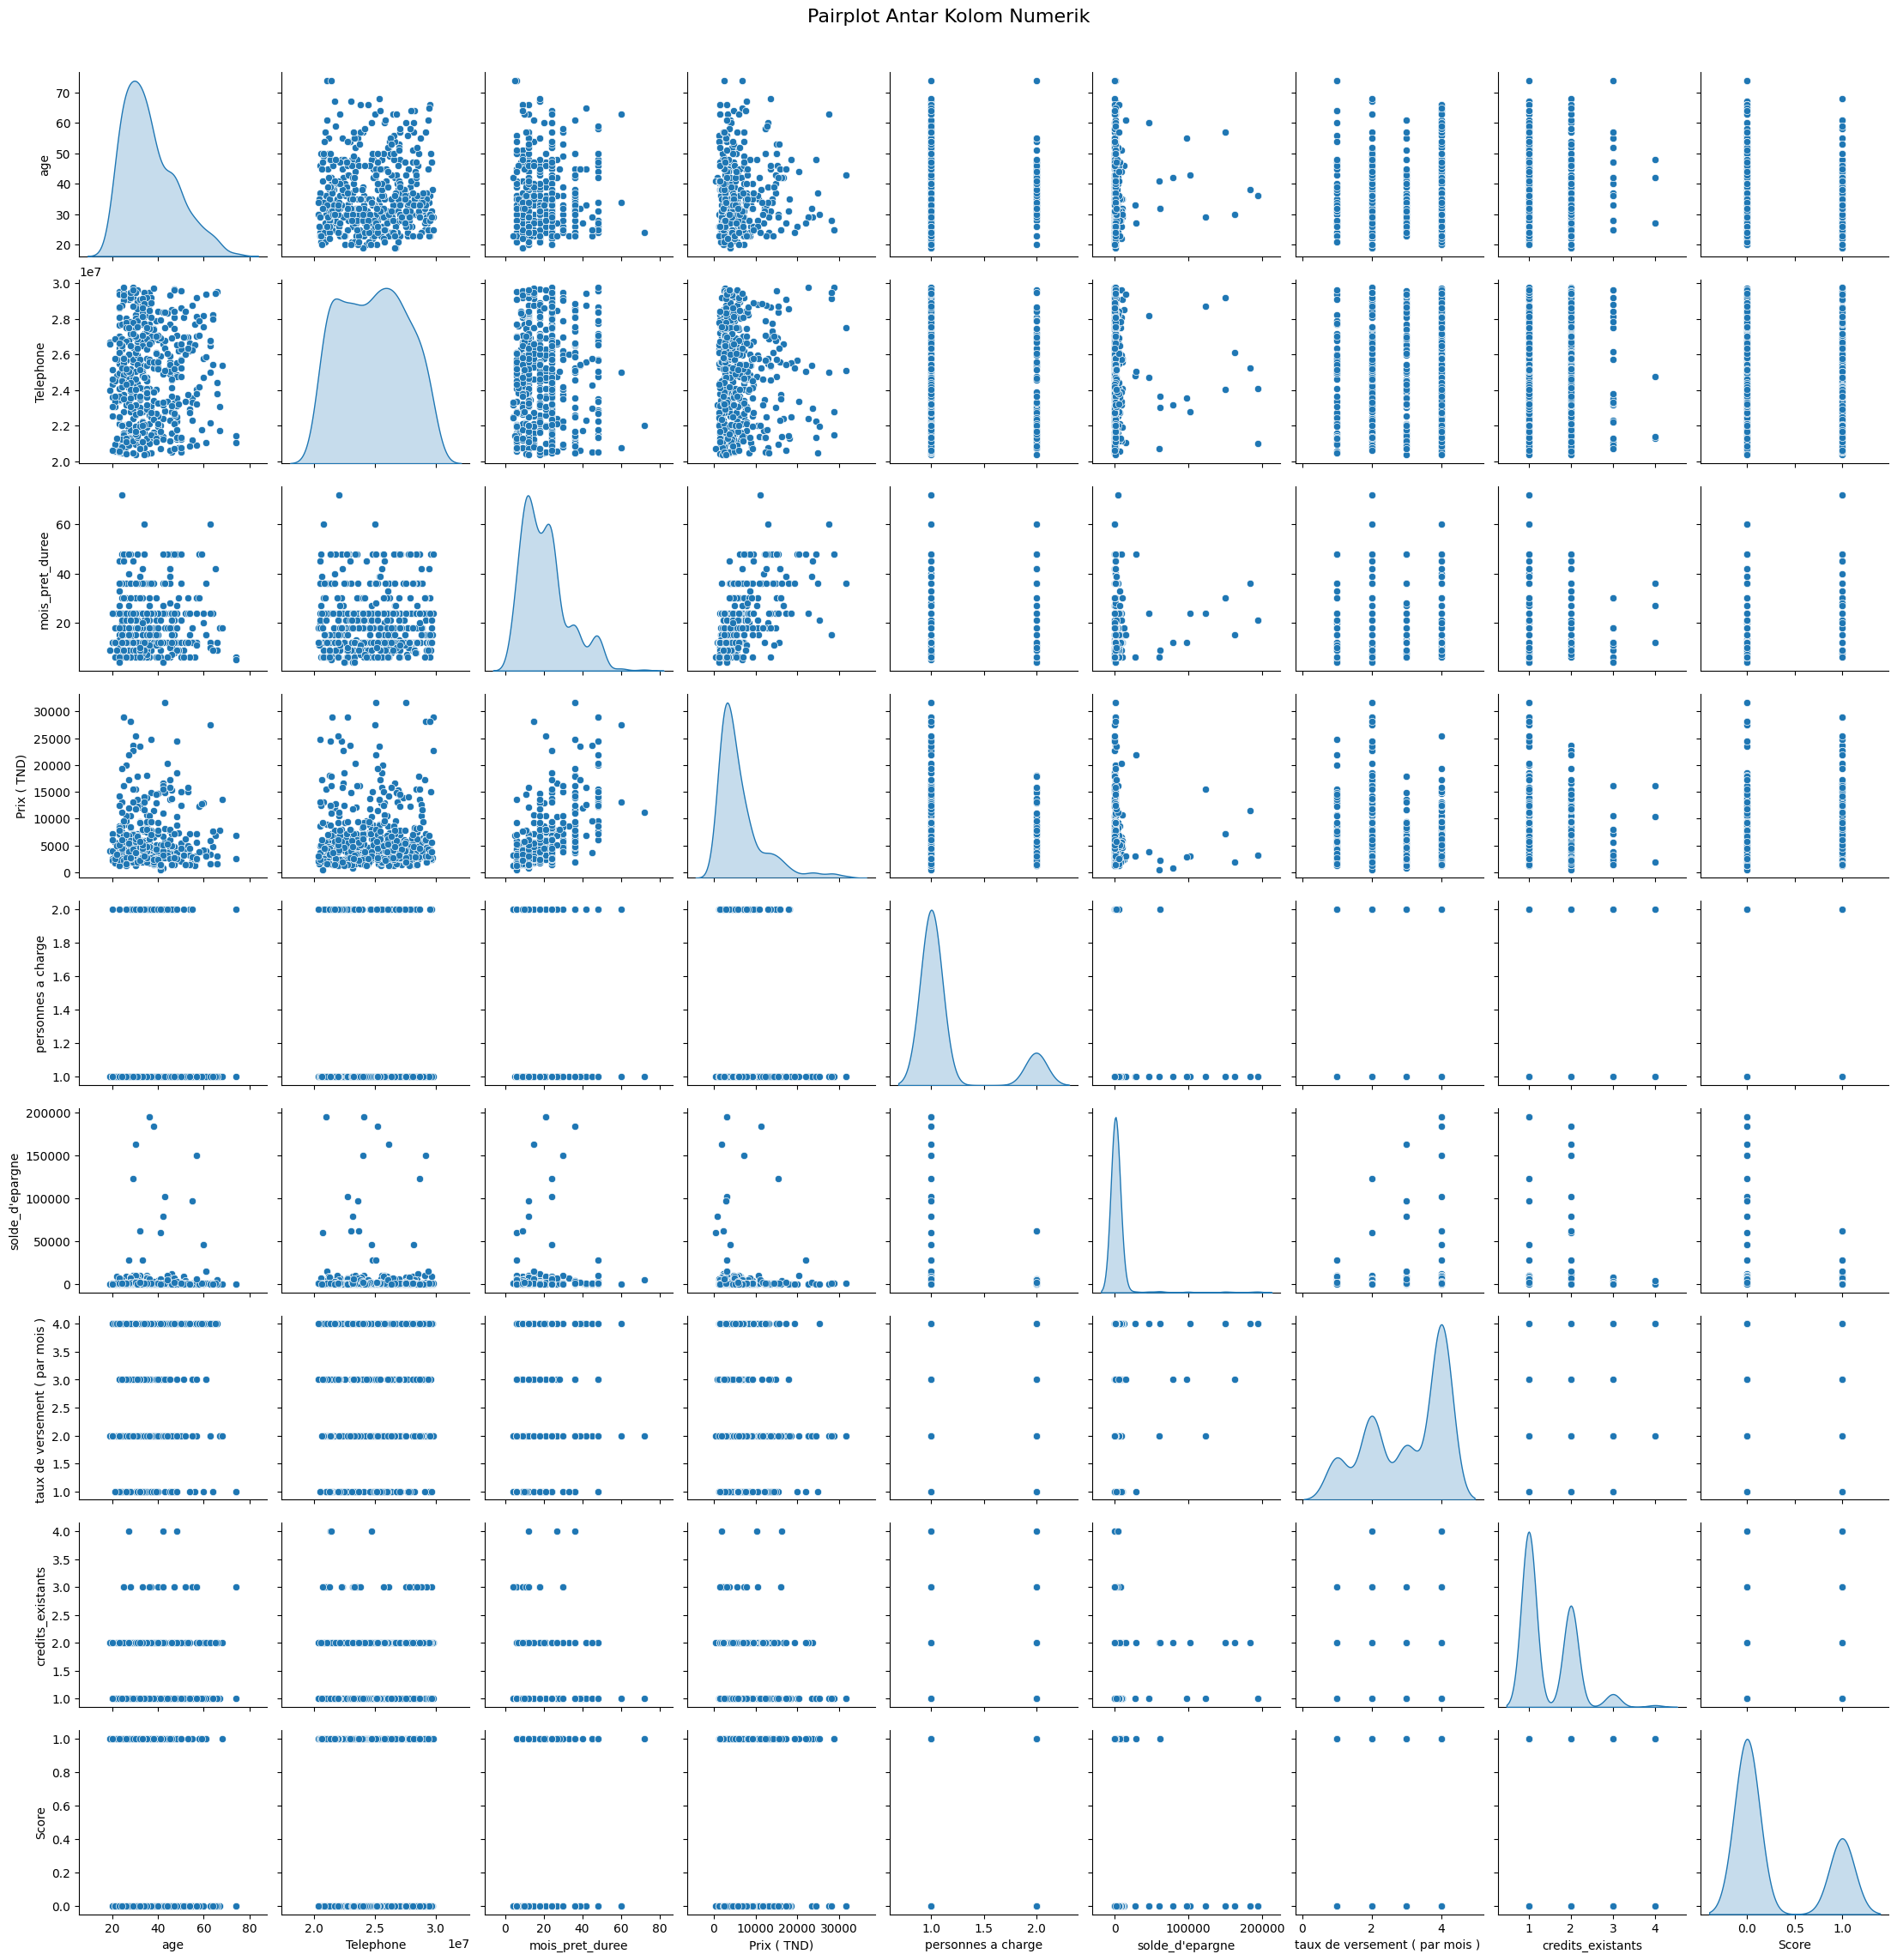

In [48]:
# Pairplot Antar Kolom Numerik
# Menggunakan sampel data untuk mempercepat proses
sample_data = df.sample(500, random_state=42) if len(df) > 500 else df
sns.pairplot(sample_data[numerical_cols], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot Antar Kolom Numerik', y=1.02, fontsize=16)
plt.show()